<a href="https://colab.research.google.com/github/Aliiub173/LegalChatbot/blob/main/Copy_of_Tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_dir = "/content/drive/MyDrive/braintumor/brain_tumor/Training"
test_dir = "/content/drive/MyDrive/braintumor/brain_tumor/Testing"


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt


In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
base_model = VGG16(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # ✅ 4 output classes
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Callbacks
checkpoint = ModelCheckpoint("vgg16_brain_tumor.h5", monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    callbacks=[checkpoint, early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5207 - loss: 1.1816

179/179 ━━━━━━━━━━━━━━━━━━━━ 1525s 8s/step - accuracy: 0.5213 - loss: 1.1801 - val_accuracy: 0.7628 - val_loss: 0.6294
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.7512 - loss: 0.6483

179/179 ━━━━━━━━━━━━━━━━━━━━ 99s 553ms/step - accuracy: 0.7512 - loss: 0.6481 - val_accuracy: 0.8330 - val_loss: 0.4591
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 545ms/step - accuracy: 0.7959 - loss: 0.5356 - val_accuracy: 0.8230 - val_loss: 0.4366
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.8181 - loss: 0.4668

179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 567ms/step - accuracy: 0.8181 - loss: 0.4668 - val_accuracy: 0.8482 - val_loss: 0.4118
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 97s 543ms/step - accuracy: 0.8286 - loss: 0.4493 - val_accuracy: 0.8375 - val_loss: 0.4170
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 544ms/step - accuracy: 0.8441 - loss: 0.4199 - val_accuracy: 0.8467 - val_loss: 0.3947
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.8498 - loss: 0.4011

179/179 ━━━━━━━━━━━━━━━━━━━━ 97s 542ms/step - accuracy: 0.8498 - loss: 0.4011 - val_accuracy: 0.8604 - val_loss: 0.3714
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 547ms/step - accuracy: 0.8616 - loss: 0.3692 - val_accuracy: 0.8589 - val_loss: 0.3751
Epoch 9/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.8626 - loss: 0.3579

179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 546ms/step - accuracy: 0.8626 - loss: 0.3580 - val_accuracy: 0.8711 - val_loss: 0.3524
Epoch 10/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 565ms/step - accuracy: 0.8622 - loss: 0.3680 - val_accuracy: 0.8604 - val_loss: 0.3703
Epoch 11/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 139s 546ms/step - accuracy: 0.8643 - loss: 0.3690 - val_accuracy: 0.8596 - val_loss: 0.3717
Epoch 12/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 549ms/step - accuracy: 0.8760 - loss: 0.3327 - val_accuracy: 0.8650 - val_loss: 0.3493
Epoch 13/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.8682 - loss: 0.3481

179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 548ms/step - accuracy: 0.8682 - loss: 0.3480 - val_accuracy: 0.8772 - val_loss: 0.3006
Epoch 14/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 97s 543ms/step - accuracy: 0.8923 - loss: 0.3004 - val_accuracy: 0.8665 - val_loss: 0.3451
Epoch 15/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.8890 - loss: 0.3059

179/179 ━━━━━━━━━━━━━━━━━━━━ 100s 559ms/step - accuracy: 0.8890 - loss: 0.3060 - val_accuracy: 0.8833 - val_loss: 0.2942
Epoch 16/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 564ms/step - accuracy: 0.8913 - loss: 0.2954 - val_accuracy: 0.8757 - val_loss: 0.3070
Epoch 17/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 97s 544ms/step - accuracy: 0.8796 - loss: 0.3144 - val_accuracy: 0.8680 - val_loss: 0.3235
Epoch 18/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 100s 561ms/step - accuracy: 0.8942 - loss: 0.2842 - val_accuracy: 0.8726 - val_loss: 0.3075
Epoch 19/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.8982 - loss: 0.2801

179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 545ms/step - accuracy: 0.8982 - loss: 0.2801 - val_accuracy: 0.8886 - val_loss: 0.2627
Epoch 20/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.9033 - loss: 0.2575

179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 545ms/step - accuracy: 0.9033 - loss: 0.2576 - val_accuracy: 0.8963 - val_loss: 0.2493


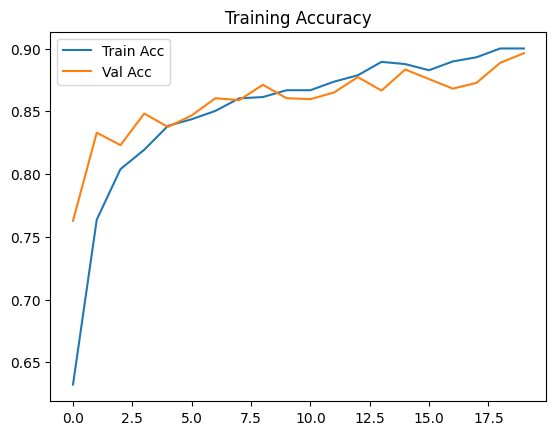

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training Accuracy")
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame from training history
history_df = pd.DataFrame(history.history)

# Round to 4 decimal places
history_df = history_df.round(4)

# Show only selected metrics
display_df = history_df[['accuracy', 'val_accuracy', 'loss', 'val_loss']]
display_df.columns = ['Train Accuracy', 'Val Accuracy', 'Train Loss', 'Val Loss']

# Display the last 5 epochs
display_df.tail(7)


,Train Accuracy,Val Accuracy,Train Loss,Val Loss
13,0.8894,0.8665,0.3040,0.3451
14,0.8876,0.8833,0.3062,0.2942
15,0.8827,0.8757,0.3031,0.3070
16,0.8897,0.8680,0.3001,0.3235
17,0.8930,0.8726,0.2866,0.3075
18,0.9000,0.8886,0.2755,0.2627
19,0.9000,0.8963,0.2632,0.2493


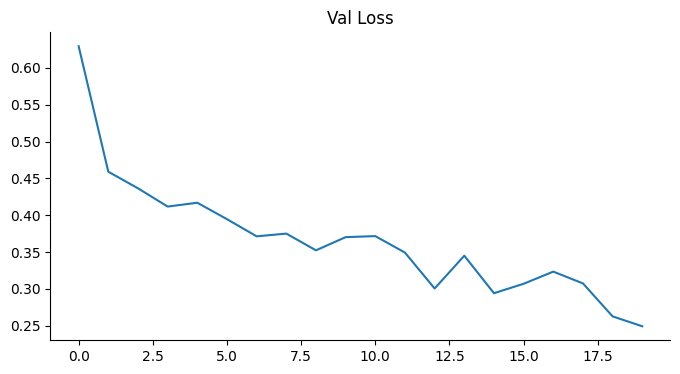

In [ ]:
from matplotlib import pyplot as plt
_df_10['Val Loss'].plot(kind='line', figsize=(8, 4), title='Val Loss')
plt.gca().spines[['top', 'right']].set_visible(False)

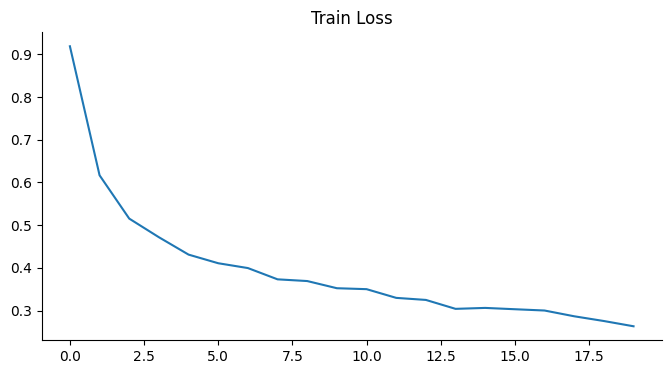

In [ ]:
from matplotlib import pyplot as plt
_df_9['Train Loss'].plot(kind='line', figsize=(8, 4), title='Train Loss')
plt.gca().spines[['top', 'right']].set_visible(False)

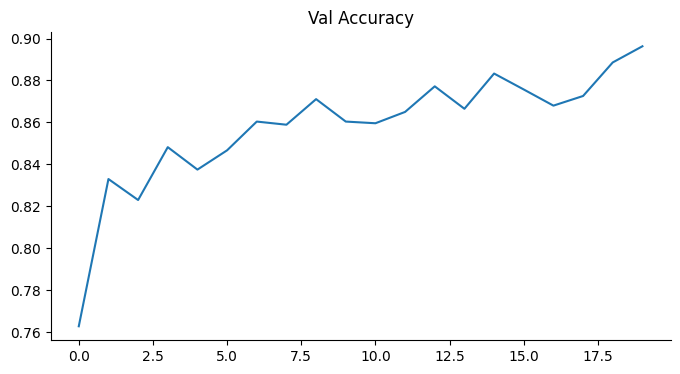

In [ ]:
from matplotlib import pyplot as plt
_df_8['Val Accuracy'].plot(kind='line', figsize=(8, 4), title='Val Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

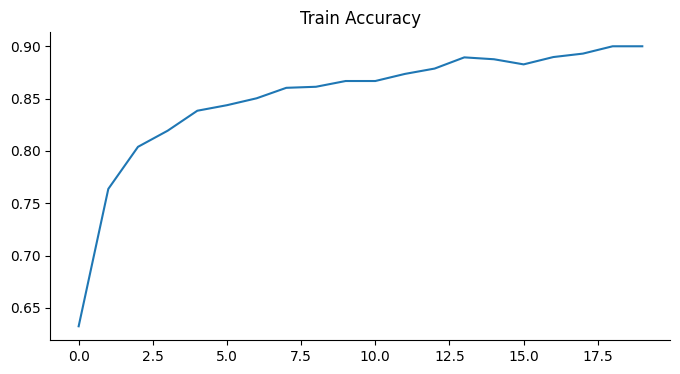

In [ ]:
from matplotlib import pyplot as plt
_df_7['Train Accuracy'].plot(kind='line', figsize=(8, 4), title='Train Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

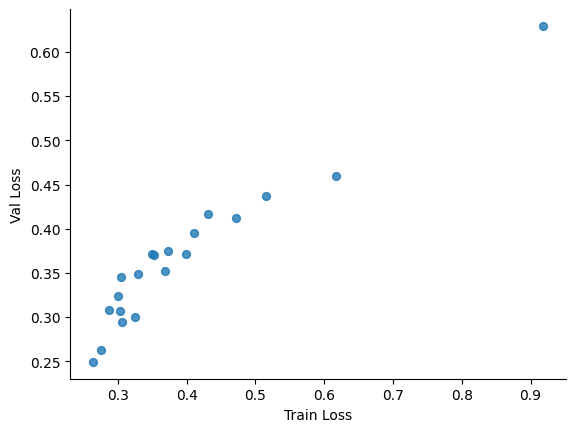

In [ ]:
from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Train Loss', y='Val Loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

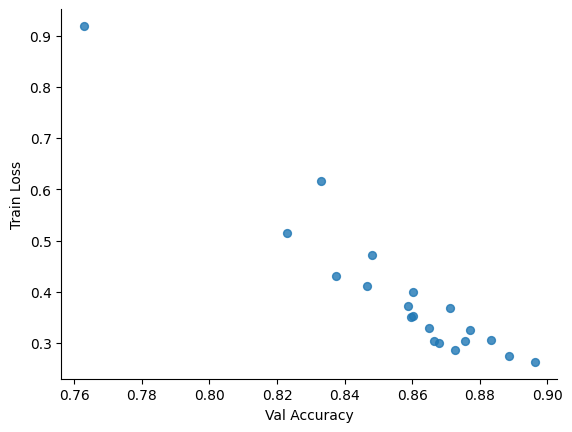

In [ ]:
from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Val Accuracy', y='Train Loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

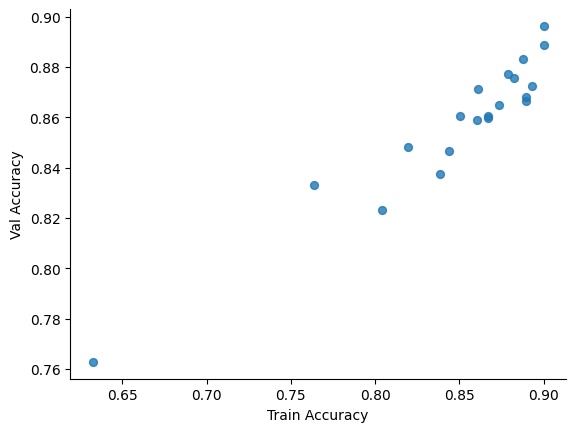

In [ ]:
from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Train Accuracy', y='Val Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

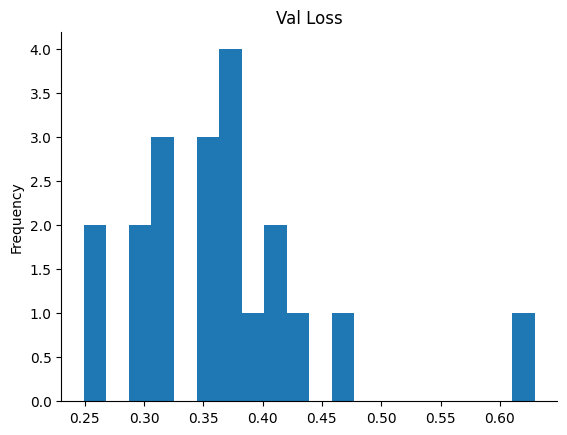

In [ ]:
from matplotlib import pyplot as plt
_df_3['Val Loss'].plot(kind='hist', bins=20, title='Val Loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

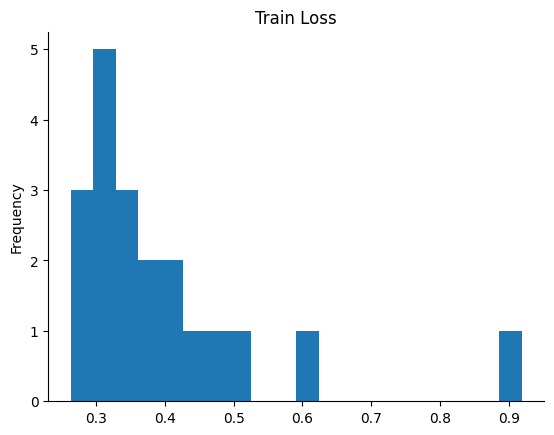

In [ ]:
from matplotlib import pyplot as plt
_df_2['Train Loss'].plot(kind='hist', bins=20, title='Train Loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

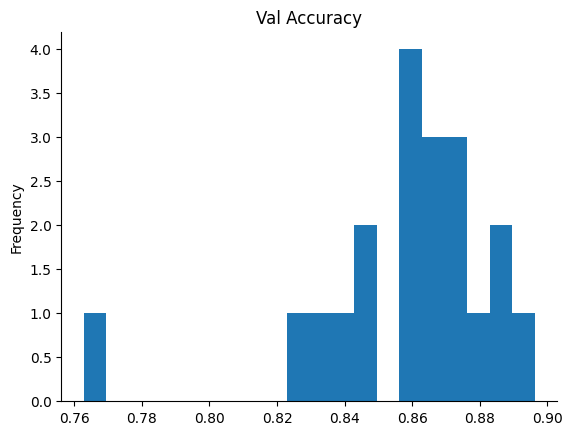

In [ ]:
from matplotlib import pyplot as plt
_df_1['Val Accuracy'].plot(kind='hist', bins=20, title='Val Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

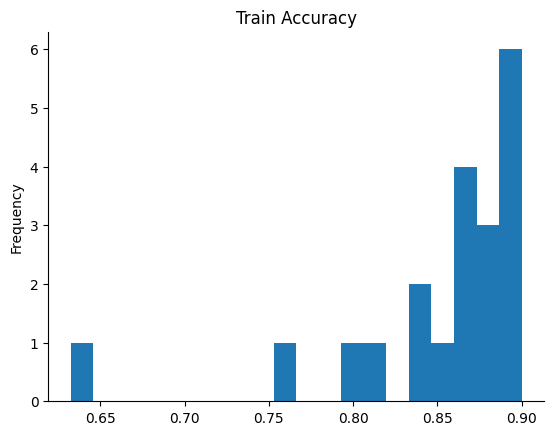

In [ ]:
from matplotlib import pyplot as plt
_df_0['Train Accuracy'].plot(kind='hist', bins=20, title='Train Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
print("hello world");

hello world


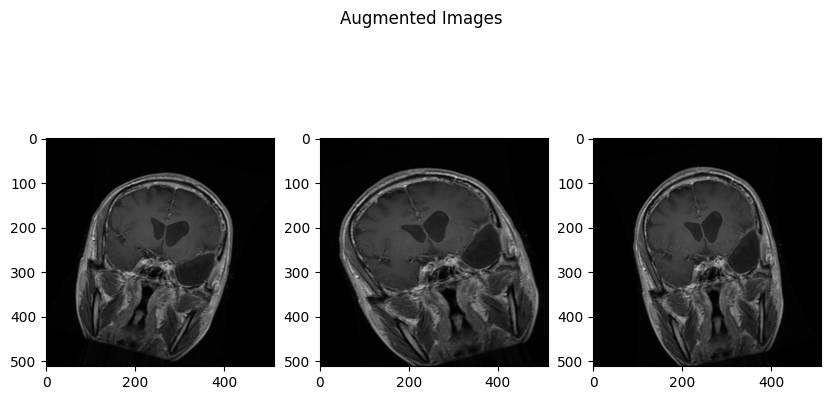

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True
)

img = load_img('/content/drive/MyDrive/braintumor/brain_tumor/Training/glioma/Tr-gl_0011.jpg')  # change path
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

plt.figure(figsize=(10, 5))
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(1, 3, i+1)
    plt.imshow(batch[0])
    i += 1
    if i == 3:
        break
plt.suptitle("Augmented Images")
plt.show()


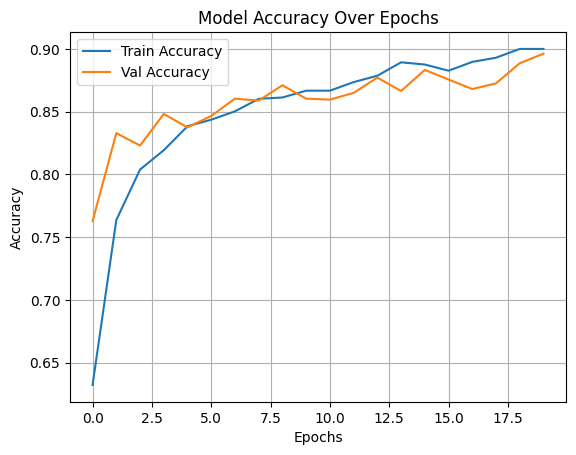

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step


<Figure size 600x600 with 0 Axes>

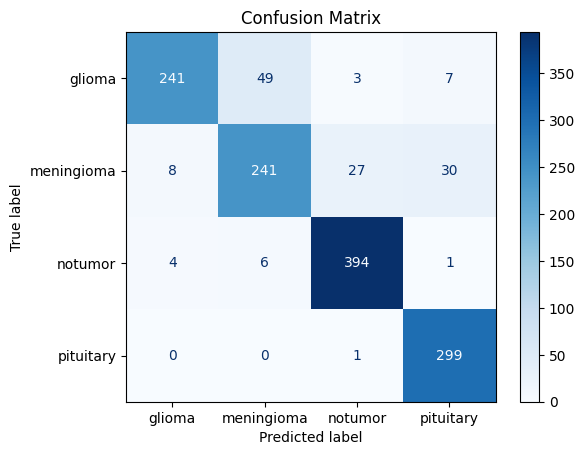

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict labels
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
true_labels = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(true_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import pandas as pd

history_df = pd.DataFrame(history.history)
history_df = history_df.round(4)

display_df = history_df[['accuracy', 'val_accuracy', 'loss', 'val_loss']]
display_df.columns = ['Train Accuracy', 'Val Accuracy', 'Train Loss', 'Val Loss']

# Display last 5 epochs for paper
display_df.tail(5)


NameError: name 'history' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import cv2

# ✅ Use any test image path from your test set
img_path = "/content/drive/MyDrive/braintumor/brain_tumor/Testing/glioma/Te-gl_0001.jpg"

# Load image and preprocess
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Load trained model
model = tf.keras.models.load_model("vgg16_brain_tumor.h5")

# Get last conv layer
grad_model = Model([model.inputs], [model.get_layer("block5_conv3").output, model.output])

# Compute gradient
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x)
    pred_index = tf.argmax(predictions[0])
    loss = predictions[:, pred_index]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

# Overlay heatmap
img_orig = cv2.imread(img_path)
img_orig = cv2.resize(img_orig, (224, 224))
heatmap = cv2.resize(heatmap.numpy(), (img_orig.shape[1], img_orig.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap_color * 0.4 + img_orig

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(heatmap, cmap='jet')
plt.title("Grad-CAM Heatmap")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(superimposed_img.astype("uint8"), cv2.COLOR_BGR2RGB))
plt.title("Overlay on MRI")

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/braintumor/brain_tumor/Testing/glioma/Te-gl_0001.jpg'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import cv2

# ✅ Use any test image path from your test set
img_path = "/content/drive/MyDrive/braintumor/brain_tumor/Testing/glioma/Te-gl_0001.jpg"

# Load image and preprocess
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

# Load trained model
model = tf.keras.models.load_model("vgg16_brain_tumor.h5")

# Get last conv layer
grad_model = Model([model.inputs], [model.get_layer("block5_conv3").output, model.output])

# Compute gradient
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x)
    pred_index = tf.argmax(predictions[0])
    loss = predictions[:, pred_index]

grads = tape.gradient(loss, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)

# Overlay heatmap
img_orig = cv2.imread(img_path)
img_orig = cv2.resize(img_orig, (224, 224))
heatmap = cv2.resize(heatmap.numpy(), (img_orig.shape[1], img_orig.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap_color * 0.4 + img_orig

# Plot results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(heatmap, cmap='jet')
plt.title("Grad-CAM Heatmap")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(superimposed_img.astype("uint8"), cv2.COLOR_BGR2RGB))
plt.title("Overlay on MRI")

plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/braintumor/brain_tumor/Testing/glioma/Te-gl_0001.jpg'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = "/content/drive/MyDrive/braintumor/brain_tumor/Training"
test_dir = "/content/drive/MyDrive/braintumor/brain_tumor/Testing"


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt


In [ ]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(rescale=1./255)

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 5722 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [ ]:
base_model = VGG16(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')  # ✅ 4 output classes
])

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Callbacks
checkpoint = ModelCheckpoint("vgg16_brain_tumor.h5", monitor='val_accuracy', save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=20,
    callbacks=[checkpoint, early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5190 - loss: 1.1577

179/179 ━━━━━━━━━━━━━━━━━━━━ 1732s 10s/step - accuracy: 0.5196 - loss: 1.1563 - val_accuracy: 0.7857 - val_loss: 0.5719
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.7412 - loss: 0.6708

179/179 ━━━━━━━━━━━━━━━━━━━━ 104s 578ms/step - accuracy: 0.7413 - loss: 0.6705 - val_accuracy: 0.8162 - val_loss: 0.4802
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.7941 - loss: 0.5427

179/179 ━━━━━━━━━━━━━━━━━━━━ 103s 572ms/step - accuracy: 0.7941 - loss: 0.5427 - val_accuracy: 0.8215 - val_loss: 0.4806
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.8057 - loss: 0.5005

179/179 ━━━━━━━━━━━━━━━━━━━━ 103s 574ms/step - accuracy: 0.8058 - loss: 0.5004 - val_accuracy: 0.8314 - val_loss: 0.4374
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.8304 - loss: 0.4419

179/179 ━━━━━━━━━━━━━━━━━━━━ 102s 570ms/step - accuracy: 0.8305 - loss: 0.4418 - val_accuracy: 0.8345 - val_loss: 0.4207
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.8361 - loss: 0.4278

179/179 ━━━━━━━━━━━━━━━━━━━━ 139s 554ms/step - accuracy: 0.8361 - loss: 0.4278 - val_accuracy: 0.8413 - val_loss: 0.3965
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.8455 - loss: 0.4020

179/179 ━━━━━━━━━━━━━━━━━━━━ 105s 586ms/step - accuracy: 0.8455 - loss: 0.4020 - val_accuracy: 0.8757 - val_loss: 0.3504
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 101s 563ms/step - accuracy: 0.8436 - loss: 0.3811 - val_accuracy: 0.8619 - val_loss: 0.3712
Epoch 9/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 100s 557ms/step - accuracy: 0.8656 - loss: 0.3712 - val_accuracy: 0.8474 - val_loss: 0.3927
Epoch 10/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 100s 560ms/step - accuracy: 0.8646 - loss: 0.3518 - val_accuracy: 0.8543 - val_loss: 0.3680
Epoch 11/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 100s 558ms/step - accuracy: 0.8773 - loss: 0.3415 - val_accuracy: 0.8703 - val_loss: 0.3264
Epoch 12/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 99s 554ms/step - accuracy: 0.8723 - loss: 0.3458 - val_accuracy: 0.8749 - val_loss: 0.3145
Epoch 13/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 100s 557ms/step - accuracy: 0.8799 - loss: 0.3254 - val_accuracy: 0.8757 - val_loss: 0.2998
Epoch 14/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 141s 551ms/step - accuracy: 0.8799 - loss: 

179/179 ━━━━━━━━━━━━━━━━━━━━ 99s 553ms/step - accuracy: 0.8801 - loss: 0.3169 - val_accuracy: 0.8863 - val_loss: 0.3024
Epoch 16/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 99s 552ms/step - accuracy: 0.8865 - loss: 0.3003 - val_accuracy: 0.8848 - val_loss: 0.2920
Epoch 17/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 103s 575ms/step - accuracy: 0.8886 - loss: 0.2942 - val_accuracy: 0.8757 - val_loss: 0.3225
Epoch 18/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 98s 549ms/step - accuracy: 0.8912 - loss: 0.2878 - val_accuracy: 0.8863 - val_loss: 0.2744
Epoch 19/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 103s 574ms/step - accuracy: 0.8895 - loss: 0.2884 - val_accuracy: 0.8833 - val_loss: 0.2787
Epoch 20/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.8906 - loss: 0.2886

179/179 ━━━━━━━━━━━━━━━━━━━━ 100s 559ms/step - accuracy: 0.8906 - loss: 0.2886 - val_accuracy: 0.8932 - val_loss: 0.2645


In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16

# Build model with Input layer (critical fix)
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
base_model.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_107']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_107']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


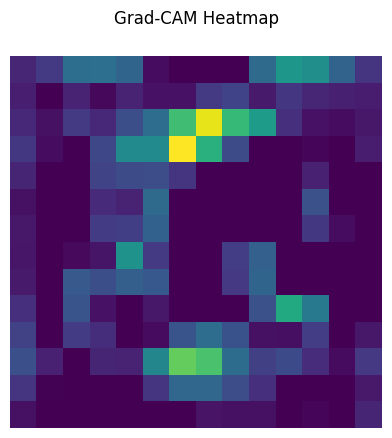

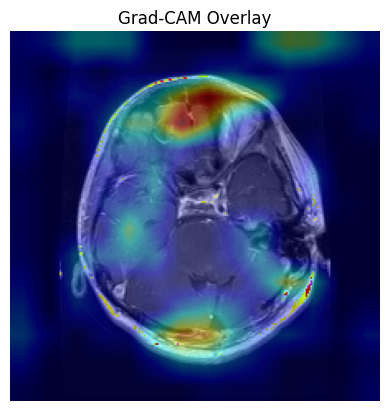

✅ Predicted Class: notumor


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam

# ===== STEP 1: Build the model using Functional API =====
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
base_model.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# ===== STEP 2: Load and preprocess the image =====
img_path = '/content/drive/MyDrive/braintumor/brain_tumor/Testing/glioma/Te-gl_0010.jpg'  # Change if needed

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Force model build
_ = model.predict(x)

# ===== STEP 3: Setup Grad-CAM model =====
last_conv_layer_name = "block5_conv3"
last_conv_layer = model.get_layer(last_conv_layer_name)

grad_model = Model(
    inputs=[model.input],
    outputs=[last_conv_layer.output, model.output]
)

# ===== STEP 4: Gradient computation =====
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x)
    pred_index = tf.argmax(predictions[0])
    pred_output = predictions[:, pred_index]

grads = tape.gradient(pred_output, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

# Normalize heatmap
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
heatmap = heatmap.numpy()

# ===== STEP 5: Visualize heatmap =====
plt.matshow(heatmap)
plt.title("Grad-CAM Heatmap")
plt.axis('off')
plt.show()

# ===== STEP 6: Superimpose on original image =====
original = cv2.imread(img_path)
original = cv2.resize(original, (224, 224))
heatmap = cv2.resize(heatmap, (224, 224))
heatmap = np.uint8(255 * heatmap)
heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap_color * 0.4 + original

# Save and display
output_path = "/content/gradcam_result.jpg"
cv2.imwrite(output_path, superimposed_img)
plt.imshow(cv2.cvtColor(superimposed_img.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM Overlay")
plt.axis('off')
plt.show()

# ===== STEP 7: Prediction Label =====
class_labels = list(test_generator.class_indices.keys())  # Optional
print("✅ Predicted Class:", class_labels[pred_index.numpy()])


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_131']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: [['keras_tensor_131']]
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


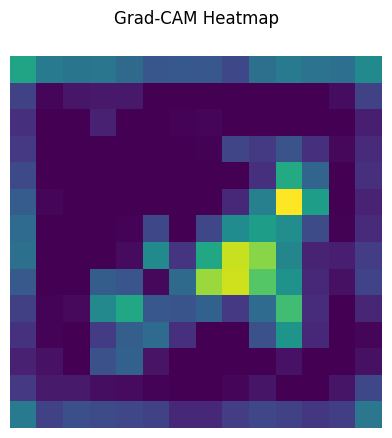

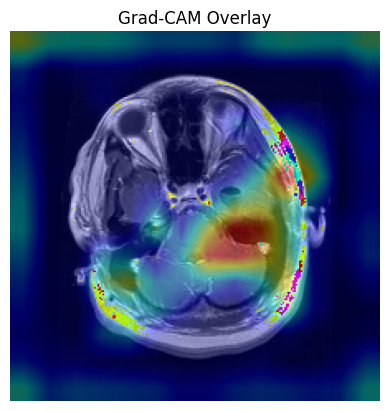

✅ Predicted Class: meningioma


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.optimizers import Adam

# ===== STEP 1: Build the model using Functional API =====
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))
base_model.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# ===== STEP 2: Load and preprocess the image =====
img_path = '/content/drive/MyDrive/braintumor/brain_tumor/Testing/glioma/Te-gl_0050.jpg'  # Change if needed

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Force model build
_ = model.predict(x)

# ===== STEP 3: Setup Grad-CAM model =====
last_conv_layer_name = "block5_conv3"
last_conv_layer = model.get_layer(last_conv_layer_name)

grad_model = Model(
    inputs=[model.input],
    outputs=[last_conv_layer.output, model.output]
)

# ===== STEP 4: Gradient computation =====
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(x)
    pred_index = tf.argmax(predictions[0])
    pred_output = predictions[:, pred_index]

grads = tape.gradient(pred_output, conv_outputs)
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

conv_outputs = conv_outputs[0]
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
heatmap = tf.squeeze(heatmap)

# Normalize heatmap
heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
heatmap = heatmap.numpy()

# ===== STEP 5: Visualize heatmap =====
plt.matshow(heatmap)
plt.title("Grad-CAM Heatmap")
plt.axis('off')
plt.show()

# ===== STEP 6: Superimpose on original image =====
original = cv2.imread(img_path)
original = cv2.resize(original, (224, 224))
heatmap = cv2.resize(heatmap, (224, 224))
heatmap = np.uint8(255 * heatmap)
heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap_color * 0.4 + original

# Save and display
output_path = "/content/gradcam_result.jpg"
cv2.imwrite(output_path, superimposed_img)
plt.imshow(cv2.cvtColor(superimposed_img.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.title("Grad-CAM Overlay")
plt.axis('off')
plt.show()

# ===== STEP 7: Prediction Label =====
class_labels = list(test_generator.class_indices.keys())  # Optional
print("✅ Predicted Class:", class_labels[pred_index.numpy()])


In [ ]:
# ✅ Save your trained model to an HDF5 file
model.save("vgg16_brain_tumor.h5")
print("✅ Model saved successfully to vgg16_brain_tumor.h5")


✅ Model saved successfully to vgg16_brain_tumor.h5


In [ ]:
from google.colab import files
files.download("vgg16_brain_tumor.h5")


FileNotFoundError: Cannot find file: vgg16_brain_tumor.h5